In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom
# Year mean 
from glob import glob 


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
fsize=12
plt.rcParams.update({'font.size': 12})
import cartopy.feature as cfeature

def plot_uv_map(uv,lon2D,lat2D,cmap=plt.cm.RdBu_r,vmax=1,vmin=-1,title=None,colorbar_title="norm(U) [m/s]",axs=None,fig=None,colorbar=True,lat_mask=None):

    #proj = ccrs.Robinson()

    if not axs:

        fig, axs = plt.subplots(nrows=1,ncols=1,
                            subplot_kw={'projection': ccrs.Robinson()},
                            figsize=(11*1,5*1))

    """
    axs.add_feature(
    cfeature.LAND,
    facecolor='lightgray',  # Couleur de remplissage
    edgecolor='black',      # Couleur des bordures (optionnel)
    zorder=2                # Ordre de dessin (0 = en arrière-plan)
    )
    """
    import cartopy
    # projection = cartopy.crs.Mercator()
    axs.add_feature(cartopy.feature.LAND, zorder=3)
    axs.add_feature(cartopy.feature.COASTLINE, zorder=3)
    axs.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
    axs.add_feature(cartopy.feature.RIVERS, zorder=3)
    for spine in axs.spines.values():
        spine.set_zorder(11)  # zorder élevé pour que les bords soient au-dessus des autres éléments

    if lat_mask is not None:
        axs.hlines(lat_mask,np.min(lon2D),np.max(lon2D),color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,np.min(lon2D),np.max(lon2D),color='k', alpha=1, linestyle='--')

    if title:
        axs.set_title(title)

    #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    p0 = axs.pcolormesh(lon2D, lat2D, uv, cmap=cmap,vmax=vmax,vmin=vmin,transform=ccrs.PlateCarree())  

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='k', alpha=0.2, linestyle='--', linewidth=1,zorder=10)

    # optional add grid lines
    #p0.axes.gridlines(color='black', alpha=0., linestyle='--')

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.2, color='black', alpha=0.8, linestyle='--')
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    #gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    #gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height

    if colorbar:
        #create new axes where the colorbar should go.
        #it should be next to the original axes and have the same height!
        pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
        cbar=plt.colorbar(p0, cax=pos_cax)
        cbar.set_label(colorbar_title)

    #cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
    #cbar = fig.colorbar(p0, cax=axs, orientation='vertical')
    #cax.set_ylabel('Number of data', fontweight='bold')


In [3]:
# Select geostrophy and product 

time_target='2019-10-27'

box_cal = [-175, -115, 20, 70]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, 0, 30, 60 ]
box_agulhas = [0, 60, -50, -30]
box_NA = [-40, 0, 48, 68]

box_mozemb = [30, 54,-35, -6]
box_kuro = [125, 170, 25, 45]

Correlation map 2019

In [4]:
# Year mean 
from glob import glob 

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time').isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))
imt = imt.interpolate_na(dim="lon", method="nearest", fill_value="extrapolate")
#ec_imt = ((imt.ugos**2 + imt.vgos**2)/2).compute()

list_of_maps = "/Odyssey/private/t22picar/data/uv/GC_daily/Ekman/globcurrent_15m_ekman_2019.nc"
gc = xr.open_dataset(list_of_maps).isel(depth=0).sel(time=slice("2019-01-01","2019-12-31"))
gc = gc.rename({"longitude":"lon"})
gc = gc.rename({"latitude":"lat"})
#gc = gc.transpose('time','lat','lon')
gc = gc.interp(lon=imt.lon,lat=imt.lat,method="linear")

In [5]:
# DUACS GEOS
"""
list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_*.nc"))
duacs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
duacs = duacs.rename({"longitude":"lon"})
duacs = duacs.rename({"latitude":"lat"})
duacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
"""

list_of_maps = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01_4th.nc"
duacs = xr.open_dataset(list_of_maps).sel(time=slice("2019-01-01","2019-12-31")).isel(lat=slice(4, -4)) #.isel(lon=slice(4, -4))


In [6]:
# U - Ugeo
U_ekman = (imt.ugos - duacs.ugos).compute() #+ diff_mean_u
# Calculer la corrélation le long de l'axe temporel (time)
correlations_u = xr.corr(U_ekman, gc.ue, dim='time')
#correlations_u = correlations_u.interpolate_na(dim="lon", method="nearest", fill_value="extrapolate")

# U - Ugeo
V_ekman = (imt.vgos - duacs.vgos).compute() #+ diff_mean_v
# Calculer la corrélation le long de l'axe temporel (time)
correlations_v = xr.corr(V_ekman, gc.ve, dim='time')
#correlations_v = correlations_v.interpolate_na(dim="lon", method="nearest", fill_value="extrapolate")



In [14]:
path_ek_dom="/Odyssey/private/t22picar/plot_article/ekman/ek_dom_mean_gc.nc"
ek_dom_mean = xr.open_dataset(path_ek_dom)
ek_dom_mean = ek_dom_mean.interp(lon=imt.lon,lat=imt.lat,method="linear") #.__xarray_dataarray_variable__.values
# Exemple avec coarsen (bins réguliers de taille 2)
binned_mean = ek_dom_mean.coarsen(lat=5, lon=5, boundary='trim').mean(skipna=True)
binned_mean_np = binned_mean.__xarray_dataarray_variable__.values

In [15]:
import matplotlib.colors as mcolors
hatch_color=mcolors.to_rgba("k")
plt.rcParams['hatch.color'] = hatch_color
plt.rcParams['hatch.linewidth'] = 0.8

/Odyssey/private/t22picar/miniforge3/envs/4dvarnet-daniel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  result = super().contourf(*args, **kwargs)


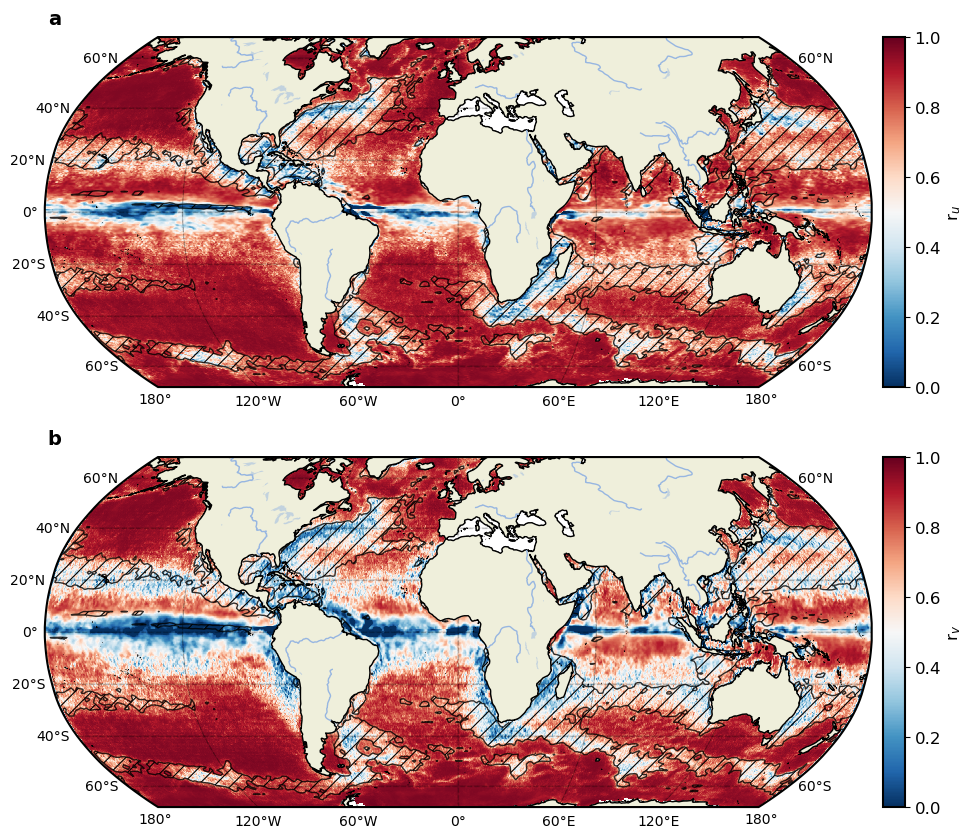

In [16]:
# Compare map 
import cartopy.crs as ccrs
proj = ccrs.Robinson()
fig, axs = plt.subplots(nrows=2,ncols=1,
                    subplot_kw={'projection': proj},
                    figsize=(11*1,5*2))

title = "U$_{Ekman}$ comparison (IMT-OSC$_{duacs}$ / GlobCurrent)"
title = ' '

level_lim=0.1
plot_uv_map(correlations_u,imt.lon,imt.lat,lat_mask=5,vmin=0,vmax=1,colorbar_title="r$_{u}$",title=title,cmap=plt.cm.RdBu_r,fig=fig,axs=axs[0])
axs[0].text(0.02, 1.08, "a", transform=axs[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
axs[0].contour(binned_mean.lon,binned_mean.lat,binned_mean_np,colors='k',levels=[level_lim],alpha=0.8,linewidths=1,transform=ccrs.PlateCarree())
axs[0].contourf(binned_mean.lon,binned_mean.lat,binned_mean_np, levels=[0, level_lim], colors=['none'], hatches=['//'],alpha=0,transform=ccrs.PlateCarree())

plot_uv_map(correlations_v,imt.lon,imt.lat,lat_mask=5,vmin=0,vmax=1,colorbar_title="r$_{v}$",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[1])
axs[1].text(0.02, 1.08, "b", transform=axs[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
axs[1].contour(binned_mean.lon,binned_mean.lat,binned_mean_np,colors='k',levels=[level_lim],alpha=0.8,linewidths=1,transform=ccrs.PlateCarree())
axs[1].contourf(binned_mean.lon,binned_mean.lat,binned_mean_np, levels=[0, level_lim], colors=['none'], hatches=['//'],edgecolor='grey',alpha=0,transform=ccrs.PlateCarree())
plt.savefig(f"../figures/Figure_ekman_duacs.png", dpi = 300,bbox_inches='tight')

Correction mean current

In [ ]:
duacs_mean = duacs.mean(dim='time').compute()
imt_mean = imt.mean(dim='time').compute()


diff_mean_u =  imt_mean.ugos - duacs_mean.ugos
diff_mean_v =  imt_mean.vgos - duacs_mean.vgos

Text(0.02, 1.08, 'b')

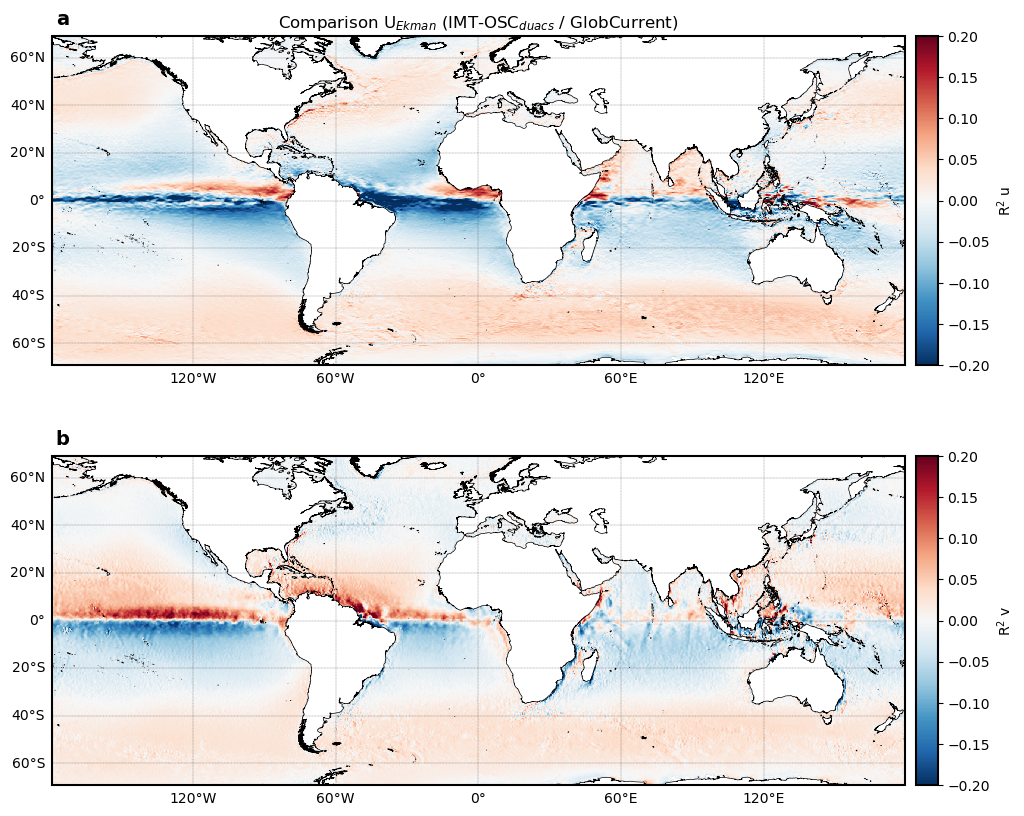

In [15]:
# Compare map 
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,5*2))

plot_uv_map(diff_mean_u,imt.lon,imt.lat,lat_mask=None,vmin=-0.2,vmax=0.2,colorbar_title="R$^{2}$ u",title="Comparison U$_{Ekman}$ (IMT-OSC$_{duacs}$ / GlobCurrent)",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[0])
axs[0].text(0.02, 1.08, "a", transform=axs[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
plot_uv_map(diff_mean_v,imt.lon,imt.lat,lat_mask=None,vmin=-0.2,vmax=0.2,colorbar_title="R$^{2}$ v",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[1])
axs[1].text(0.02, 1.08, "b", transform=axs[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))

In [ ]:
# U - Ugeo
U_ekman = imt.ugos - duacs.ugos - diff_mean_u
# Calculer la corrélation le long de l'axe temporel (time)
correlations_u = xr.corr(U_ekman, gc.ue, dim='time').compute()

# U - Ugeo
V_ekman = imt.vgos - duacs.vgos - diff_mean_v
# Calculer la corrélation le long de l'axe temporel (time)
correlations_v = xr.corr(V_ekman, gc.ve, dim='time').compute()

# Compare map 
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,5*2))

plot_uv_map(correlations_u,imt.lon,imt.lat,lat_mask=None,vmin=0,vmax=1,colorbar_title="R$^{2}$ u",title="Comparison U$_{Ekman}$ (IMT-OSC$_{duacs}$ / GlobCurrent)",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[0])
axs[0].text(0.02, 1.08, "a", transform=axs[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
plot_uv_map(correlations_v,imt.lon,imt.lat,lat_mask=None,vmin=0,vmax=1,colorbar_title="R$^{2}$ v",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[1])
axs[1].text(0.02, 1.08, "b", transform=axs[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
#plt.savefig(f"../figures/Figure_ekman.png", dpi = 300,bbox_inches='tight')


Correction cyclo

In [19]:
# DUACS CYCLO

list_of_maps = sorted(glob("/Odyssey/private/t22picar/process_data/cyclogeo/rec/duacs_cyclo_8th_*.nc"))
duacs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time') #.sel(time=slice("2019-01-01","2019-01-31"))
#duacs = duacs.rename({"longitude":"lon"})
#duacs = duacs.rename({"latitude":"lat"})
duacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")

# DUACS GEOS
'''
list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_*.nc"))
duacs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time') #.sel(time=slice("2019-01-01","2019-01-31"))
duacs = duacs.rename({"longitude":"lon"})
duacs = duacs.rename({"latitude":"lat"})
duacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")


imt = imt #.sel(time=slice("2019-01-01","2019-01-31"))
gc = gc #.sel(time=slice("2019-01-01","2019-01-31"))
'''

'\nlist_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_*.nc"))\nduacs = xr.open_mfdataset(list_of_maps, combine=\'nested\', concat_dim=\'time\') #.sel(time=slice("2019-01-01","2019-01-31"))\nduacs = duacs.rename({"longitude":"lon"})\nduacs = duacs.rename({"latitude":"lat"})\nduacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")\n\n\nimt = imt #.sel(time=slice("2019-01-01","2019-01-31"))\ngc = gc #.sel(time=slice("2019-01-01","2019-01-31"))\n'

In [20]:
# U - Ucyclo 
U_ekman_cyclo = imt.ugos - duacs.ugos
# Calculer la corrélation le long de l'axe temporel (time)
correlations_cyclo_u = xr.corr(U_ekman_cyclo, gc.ue, dim='time')

# U - Ugeo
V_ekman_cyclo = imt.vgos - duacs.vgos
# Calculer la corrélation le long de l'axe temporel (time)
correlations_cyclo_v = xr.corr(V_ekman, gc.ve, dim='time')

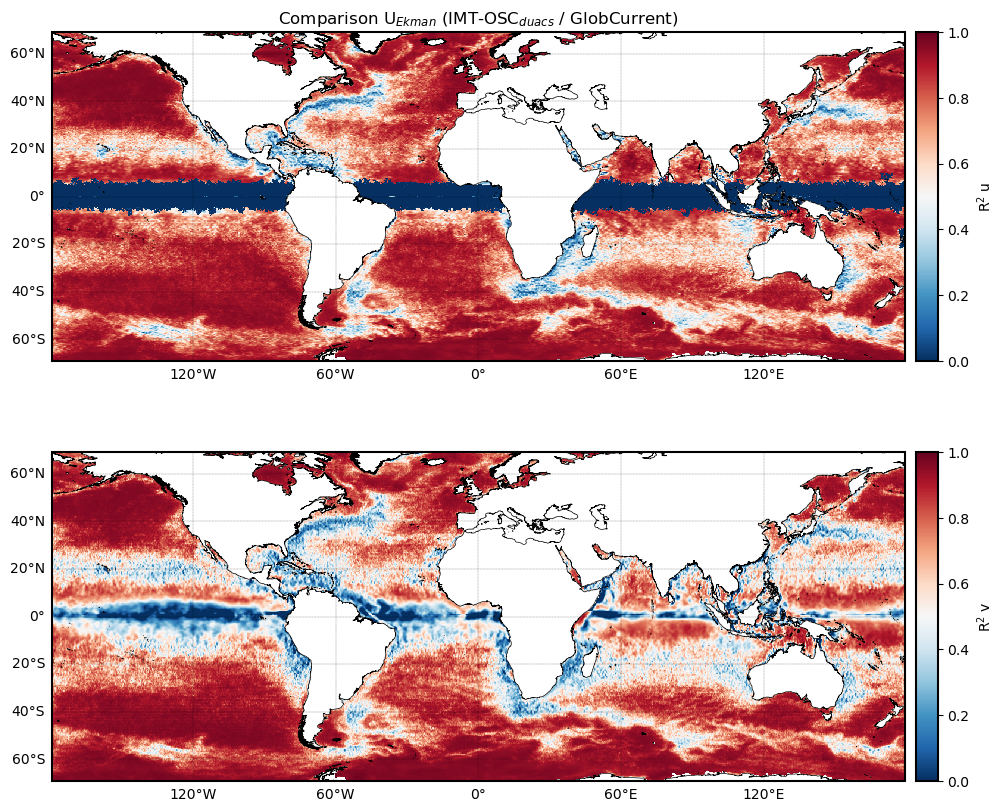

In [21]:
# Compare map 
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,5*2))

plot_uv_map(correlations_cyclo_u,imt.lon,imt.lat,lat_mask=None,vmin=0,vmax=1,colorbar_title="R$^{2}$ u",title="Comparison U$_{Ekman}$ (IMT-OSC$_{duacs}$ / GlobCurrent)",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[0])
plot_uv_map(correlations_cyclo_v,imt.lon,imt.lat,lat_mask=None,vmin=0,vmax=1,colorbar_title="R$^{2}$ v",cmap=plt.cm.RdBu_r,fig=fig,axs=axs[1])
plt.savefig(f"../figures/correlation_Uekman_cyclo.png", dpi = 300)

In [ ]:
u_geo.shape

(560, 1440)

In [ ]:
# U - Ucyclo 
U_ekman_cyclo = imt.ugos - u_geo
# Calculer la corrélation le long de l'axe temporel (time)
correlations_cyclo = xr.corr(U_ekman_cyclo, gc.ue, dim='time')

In [ ]:
# Compare map 
plot_uv_map(correlations_cyclo,imt.lon,imt.lat,lat_mask=None,vmin=0,vmax=1,colorbar_title="R$^{2}$",title="Comparison U$_{Ekman}$ IMT-OSC$_{duacs}$ and GlobCurrent",cmap=plt.cm.hot_r)

Compute Beta et Theta ? 

In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Données simulées (remplace par tes données)
u_ek = np.array([1+1j, 1.5+0.5j, 0.8+1.2j])  # Exemple de vecteur complexe
tau = np.array([1, 1, 1])  # Exemple de vecteur tau (remplace par tes données)

# Fonction de coût à minimiser
def cost_function(params, u_ek, tau):
    beta, theta = params
    model = beta * tau * np.exp(1j * theta)
    return np.abs(model - u_ek)  # Erreur quadratique sur les parties réelle et imaginaire

# Initialisation des paramètres
initial_params = np.array([1.0, 0.0])  # beta=1, theta=0

# Optimisation
result = least_squares(cost_function, initial_params, args=(u_ek, tau))
beta_hat, theta_hat = result.x

print(f"Estimation de beta: {beta_hat:.4f}")
print(f"Estimation de theta: {theta_hat:.4f} radians")